# Dynamic height from satellite observation

In [1]:
import numpy as np
import numpy.matlib
import gsw
import matplotlib.pyplot as plt
import netCDF4 as nc

In [2]:
# get SSH from AVISO satellite
# read in netCDF
df=nc.Dataset('zos_AVISO_L4_clim.nc')
print(df.variables.keys()) # shows the name of variables

dict_keys(['time', 'time_bnds', 'lon', 'lon_bnds', 'lat', 'lat_bnds', 'zos'])


In [3]:
lat=df['lat'][:]
lon=df['lon'][:]
zos=df['zos'][:]
ssh0=np.mean(zos,0)
ssh1=np.roll(ssh0,180,axis=1)
lon1=np.arange(-179.5,180.5,1)

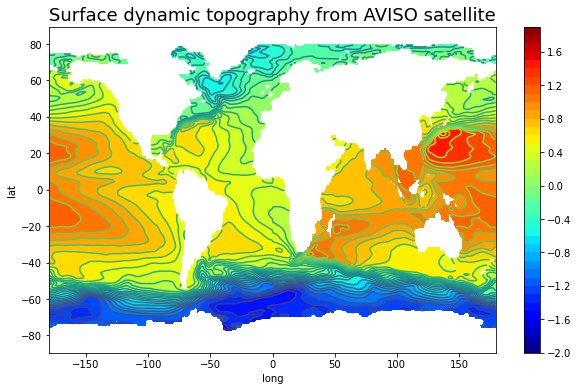

In [4]:
# plot surface dynamic height wrt 2000 dbar
plt.figure(figsize=(10,6))
cnt=np.arange(-2,2,.1)
plt.contourf(lon1,lat,ssh1,cnt,cmap='jet')
plt.colorbar()
plt.contour(lon1,lat,ssh1,cnt,linestyles='solid')
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Surface dynamic topography from AVISO satellite',fontsize=18)
plt.show()